<a href="https://colab.research.google.com/github/phgallop/pyLearn/blob/main/ml_linearregression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendendo Machine Learning


Vamos começar?

# Machine Learning - Regressão Linear

Essa atividade nos mostra como prever eventos com base em uma série temporal usando o mercado de ações como exemplo. Vamos começar.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('apple.csv')

dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset.head()

Saving apple.csv to apple.csv


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
1,2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2,2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
3,2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
4,2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0


# Explorando os dados

Podemos descobrir como os dados se comportam. Como, por exemplo, descobrir qual o valor medio de abertura da ação de 2010 a 2017

In [ ]:
dataset['Open'].mean()

np.float64(313.0745002837685)

# Exercicio 1 - Explorando os dados

1. Selecione o maior valor de abertura da ação 'Open' e o menor valor de fechamento 'Close'
2. Calcule a diferença entre o maior valor da coluna 'High' e o menor valor da coluna 'Low'
3. Selecione a data maior valor da ação 'High' e a data do menor valor da ação 'Low'

# Visualizando os dados

Podemos imprimir o valor da ação durante o periodo ou qualquer outra correlação temporal para avaliar o que aconteceu no mercado

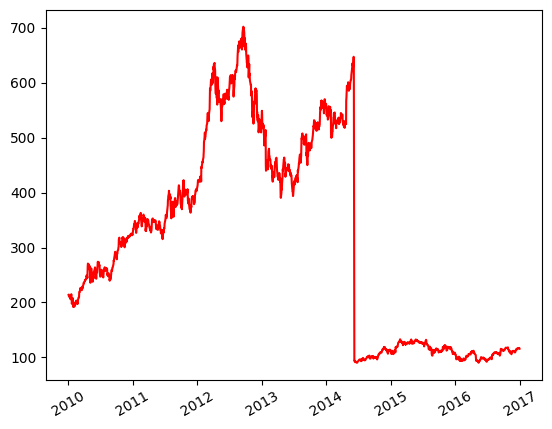

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt

data = dataset[['Date', 'Close']]

# Adjusting the size of matplotlib
plt.plot(dataset['Date'], dataset['Close'], color='r', linestyle='-')
plt.xticks(rotation=30)
plt.show()

# Exercicio 2 - Vizualizando os dados

**Determinando a flutuação da ação**

A flutuação de uma ação durante o dia pode ser um indicativo da sua estabilidade. A flutuação é dada pelo a diferença entre valor máximo e o valor mínimo da ação em um mesmo dia. Dado isso:
1.  Calcule a flutuação das ações em todo o dataset - utilize a função abs() - https://www.programiz.com/python-programming/methods/built-in/abs caso precise do valor absoluto
2.  Construa um gráfico da flutação da ação
3.  Selecione todas as vezes que a flutuação da ação superou 5 dolares



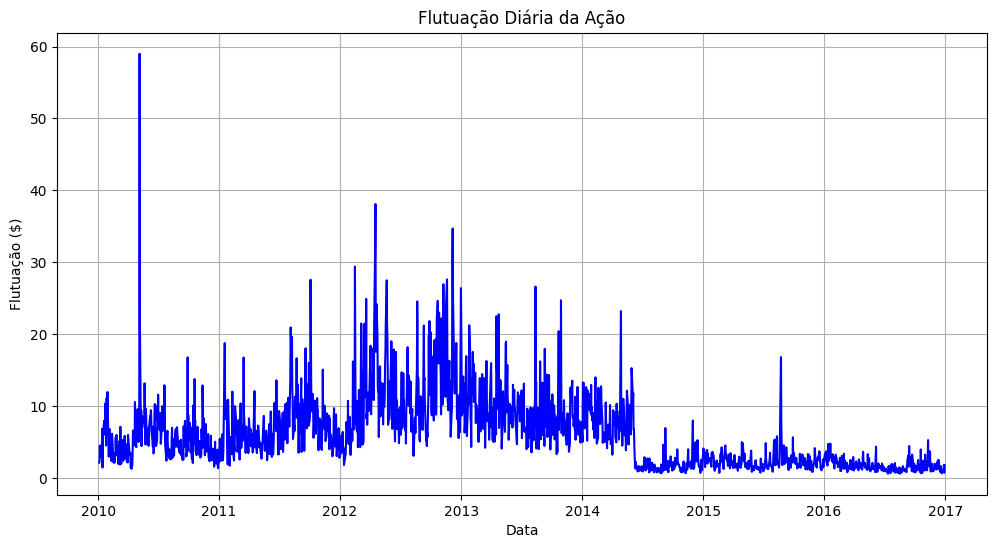

In [ ]:
import matplotlib.pyplot as plt

dataset['Flutuacao'] = abs(dataset['High'] - dataset['Low'])
plt.figure(figsize=(12,6))
plt.plot(dataset['Date'], dataset['Flutuacao'], color='blue', linestyle='-')
plt.title('Flutuação Diária da Ação')
plt.xlabel('Data')
plt.ylabel('Flutuação ($)')
plt.grid(True)
plt.show()

# Entendendo a relação entre os dados

**Que fatores influenciam sobre o valor da ação?**

A correlação entre campus determina o quanto dois campos variam em conjunto. importante entender que correlação da variação **não significa causalidade** e somente que possuem uma variação parecida

In [ ]:
dataset.corr(method ='pearson')

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,1.000000,-0.479131,-0.479602,-0.477740,-0.479049,0.479776,0.016913,0.011008,0.910577,0.911097,0.911425,0.911256,-0.662120
Open,-0.479131,1.000000,0.999867,0.999808,0.999650,-0.628790,0.059274,-0.028348,-0.443058,-0.443899,-0.443629,-0.444101,0.410587
High,-0.479602,0.999867,1.000000,0.999792,0.999852,-0.626999,0.058701,-0.028317,-0.443960,-0.444521,-0.444414,-0.444662,0.414420
Low,-0.477740,0.999808,0.999792,1.000000,0.999832,-0.632530,0.059180,-0.028347,-0.442370,-0.443094,-0.442558,-0.443035,0.402723
Close,-0.479049,0.999650,0.999852,0.999832,1.000000,-0.630036,0.058721,-0.028224,-0.443599,-0.444099,-0.443792,-0.443935,0.408565
Volume,0.479776,-0.628790,-0.626999,-0.632530,-0.630036,1.000000,-0.040656,0.056085,0.555781,0.561603,0.547143,0.553518,-0.038293
Ex-Dividend,0.016913,0.059274,0.058701,0.059180,0.058721,-0.040656,1.000000,-0.001925,0.003714,0.003074,0.003558,0.003089,-0.014022
Split Ratio,0.011008,-0.028348,-0.028317,-0.028347,-0.028224,0.056085,-0.001925,1.000000,0.010792,0.011076,0.010743,0.011603,-0.007447
Adj. Open,0.910577,-0.443058,-0.443960,-0.442370,-0.443599,0.555781,0.003714,0.010792,1.000000,0.999709,0.999653,0.999343,-0.599206
Adj. High,0.911097,-0.443899,-0.444521,-0.443094,-0.444099,0.561603,0.003074,0.011076,0.999709,1.000000,0.999565,0.999700,-0.595391


# Exercicio 3 - Identificando a correlação

1. Selecione os campos 'Close' e 'Volume' e calcule a correlação entre eles
2. Identifique quais campos possuem correlação maior que 90%

In [ ]:
corr_close_volume = dataset['Close'].corr(dataset['Volume'], method='pearson')
print(corr_close_volume)

-0.6300355158669755


# Prevendo o valor das ações

Utilizaremos a regressão Linear para prever as tendências das ações

In [ ]:
dataExample = dataset[['High', 'Low','Volume','Close']]
#dataExample.head()

caracteristicas = dataExample[['High', 'Low', 'Volume']]
saida = dataExample['Close']
#display(caracteristicas.head(), saida.head())

# separando a base de treinamento da base de teste
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(caracteristicas, saida, test_size=0.30)
#display(X_treinamento.head(), y_treinamento.head())

from sklearn.linear_model import LinearRegression

# Regressao linear
stockModel = LinearRegression(n_jobs=-1)
stockModel.fit(X_treinamento, y_treinamento)

LinearRegression(n_jobs=-1)

# Identificando se o modelo foi bem treinado

Podemos utilizar varias métricas para saber o quanto o algoritmo está "errando" nas suas previsões. O R^2, coeficiente de determinação é uma forma de avaliar se o modelo está ajustado.

In [ ]:
from sklearn.metrics import mean_squared_error

r2 = stockModel.score(X_teste, y_teste)
print('A regressão linear possui confiança de ', r2)

RMSE = mean_squared_error(y_teste, stockModel.predict(X_teste))**0.5
print('Erro médio quadratico:', RMSE)

A regressão linear possui confiança de  0.9997802729339124
Erro médio quadratico: 2.740222370350985


# Fazendo previsões



In [ ]:
forecast = stockModel.predict(X_teste)

dataTeste = pd.DataFrame({'Volume':X_teste['Volume'], 'Close':y_teste}).reset_index()
dataPrevisao = pd.DataFrame({'Predict':forecast})
dataExibicao = pd.DataFrame({'Real':dataTeste['Close'], 'Previsao':dataPrevisao['Predict']})
dataExibicao['Erro'] = dataExibicao['Real'].sub(dataExibicao['Previsao'])

dataExibicao.head()

,Real,Previsao,Erro
0,577.67,582.930092,-5.260092
1,605.23,615.193363,-9.963363
2,118.93,118.831897,0.098103
3,348.20,347.723287,0.476713
4,126.78,126.579676,0.200324


<Axes: >

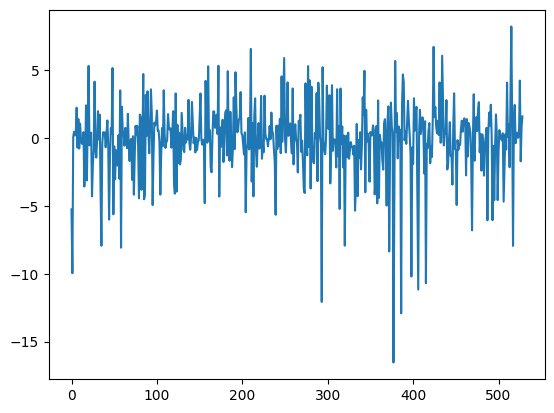

In [ ]:
dataExibicao['Erro'].plot()